# Exploration of Deep Learning in Computer Vision with Transfer Learning
Task7 | week 7

Names of Trainees : SAFA ,NEDAA , AREEJ

#1. Dataset Selection:
• Choose a computer vision dataset suitable for classification
or object detection tasks. The
dataset should be publicly available and appropriate for transfer learning experiments.

• Ensure the dataset contains a sufficient number of images and corresponding labels for
training and evaluation.



*   The dataset chosen was from a source platform kaggle
*   We inform you that the subject of the data set is about
          **Waste Classification data**

 *This dataset contains 22500 images of organic and recyclable objects*






In [2]:
!pip install opendatasets
import numpy as np
import pandas as pd
import opendatasets as od


In [3]:
# Assign the Kaggle data set URL into variable
dataset = 'https://www.kaggle.com/datasets/techsash/waste-classification-data'
# Using opendatasets let's download the data sets
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ii1nas
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data


100%|██████████| 427M/427M [00:05<00:00, 84.1MB/s]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import tensorflow
import tqdm
import glob

from tqdm import tqdm

from skimage.io import imread, imshow
# from skimage.transform import resize

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, BatchNormalization, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import confusion_matrix
import seaborn as sns

%matplotlib inline

In [5]:
train_path = "/content/waste-classification-data/DATASET/TRAIN"
test_path = "/content/waste-classification-data/DATASET/TEST"

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from glob import glob
import cv2

In [7]:
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 12565/12565 [00:13<00:00, 928.18it/s]


#2. Transfer Learning Implementation:
• Preprocess the selected dataset, including data augmentation techniques such as rotation, flipping, and resizing.

• Choose a pre-trained deep learning model (e.g., VGG, ResNet, Inception) suitable for transfer learning.

• Implement transfer learning by loading the pre-trained model and fine-tuning it on the selected dataset.

• Train the transferred model on the dataset and monitor its performance during training.

• Evaluate the performance of the transferred model on a separate validation set and compare it with the performance of a model
trained from scratch.

In [17]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from keras.utils import image_dataset_from_directory

In [18]:
#Importing Training Data
train_data=image_dataset_from_directory(
    directory="/content/waste-classification-data/DATASET/TRAIN",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(100,100)
    )

Found 22564 files belonging to 2 classes.


In [19]:
#Importing Testing Data
test_data=image_dataset_from_directory(
    directory="/content/waste-classification-data/DATASET/TEST",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(100,100)
    )

Found 2513 files belonging to 2 classes.


In [20]:
#Importing VGG16
from keras.applications.vgg16 import VGG16
vgg=VGG16(include_top=False,weights='imagenet',input_shape=(100,100,3))

In [21]:
#Trainable
vgg.trainable=False

In [22]:
#Building Model
model=Sequential()
#Adding EfficientNetB1 Layer
model.add(vgg)
#Adding Flatten Layer
model.add(Flatten())
#Addding ANN Layer
model.add(Dense(32,activation='relu'))
#Adding Output Layer
model.add(Dense(1,activation='sigmoid'))

In [23]:
#Model Compilation
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
#Model Training
history=model.fit(train_data,validation_data=test_data,epochs=5)

Epoch 1/5
706/706 [==============================] - 2608s 4s/step - loss: 0.4611 - accuracy: 0.8743 - val_loss: 0.7942 - val_accuracy: 0.8659
Epoch 2/5
706/706 [==============================] - 2607s 4s/step - loss: 0.2749 - accuracy: 0.9142 - val_loss: 0.8409 - val_accuracy: 0.8552
Epoch 3/5
706/706 [==============================] - 2523s 4s/step - loss: 0.2027 - accuracy: 0.9373 - val_loss: 0.9523 - val_accuracy: 0.8388
Epoch 4/5
706/706 [==============================] - 2533s 4s/step - loss: 0.1470 - accuracy: 0.9527 - val_loss: 1.0473 - val_accuracy: 0.8635
Epoch 5/5
706/706 [==============================] - 2539s 4s/step - loss: 0.1113 - accuracy: 0.9653 - val_loss: 1.1853 - val_accuracy: 0.8579


In [32]:
#On Test Data
model.evaluate(test_data)[1]*100

79/79 [==============================] - 263s 3s/step - loss: 1.1853 - accuracy: 0.8579


85.79387068748474

In [33]:
model.save('VGG_model_path.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


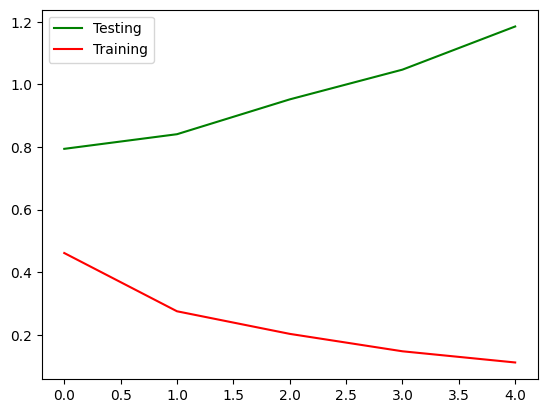

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'],label="Testing",color='Green')
plt.plot(history.history['loss'],label="Training",color='Red')
plt.legend()
plt.show()

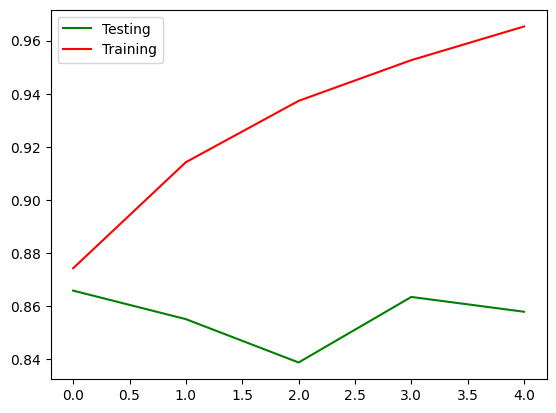

In [35]:
plt.plot(history.history['val_accuracy'],label="Testing",color='Green')
plt.plot(history.history['accuracy'],label="Training",color='Red')
plt.legend()
plt.show()